<a href="https://colab.research.google.com/github/yih789/Data-Analysis-and-Image-Processing/blob/master/Pandas%EC%9D%98_%EC%97%B0%EC%82%B0%EA%B3%BC_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas의 연산과 함수
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/24.%20Pandas%EC%9D%98%20%EC%97%B0%EC%82%B0%EA%B3%BC%20%ED%95%A8%EC%88%98/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20Pandas%EC%9D%98%20%EC%97%B0%EC%82%B0%EA%B3%BC%20%ED%95%A8%EC%88%98.pdf)

**데이터 프레임의 Null 여부 확인**

In [0]:
import pandas as pd
import numpy as np

word_dict = {
    'Apple': '사과',
    'Banana': '바나나',
    'Carrot': '당근',
    'Durian': '두리안'
}

frequency_dict = {
    'Apple': 3,
    'Banana': 5,
    'Carrot': np.nan, # not a number = NULL
    'Durian': 2
}

importance_dict = {
    'Apple': 3,
    'Banana': 2,
    'Carrot': 1,
    'Durian': 1
}

word = pd.Series(word_dict)
frequency = pd.Series(frequency_dict)
importance = pd.Series(importance_dict)

summary = pd.DataFrame({
    'word': word,
    'frequency': frequency,
    'importance': importance
})

print(summary)
print(summary.notnull()) # NULL 값이 아닌 것만 True
print(summary.isnull()) # NULL 값인 것 True
summary['frequency'] = summary['frequency'].fillna('데이터 없음')
print(summary)

       word  frequency  importance
Apple    사과        3.0           3
Banana  바나나        5.0           2
Carrot   당근        NaN           1
Durian  두리안        2.0           1
        word  frequency  importance
Apple   True       True        True
Banana  True       True        True
Carrot  True      False        True
Durian  True       True        True
         word  frequency  importance
Apple   False      False       False
Banana  False      False       False
Carrot  False       True       False
Durian  False      False       False
       word frequency  importance
Apple    사과         3           3
Banana  바나나         5           2
Carrot   당근    데이터 없음           1
Durian  두리안         2           1


**시리즈 자료형의 연산**

In [0]:
import pandas as pd

array1 = pd.Series([1, 2, 3], index=['A', 'B', 'C'])
array2 = pd.Series([4, 5, 6], index=['B', 'C', 'D'])

# fill_value를 이용하여 연산할 두 시리즈의 데이터가 맞지 않을 때 처리하기
# 자신에게 존재하지 않는 상대의 인덱스의 값을 0으로 처리
# 처리하지 않으면 null값 저장된다.
array = array1.add(array2, fill_value=0)
print(array)

array = array1.add(array2)
print(array)

A    1.0
B    6.0
C    8.0
D    6.0
dtype: float64
A    NaN
B    6.0
C    8.0
D    NaN
dtype: float64


**데이터 프레임 자료형의 연산**

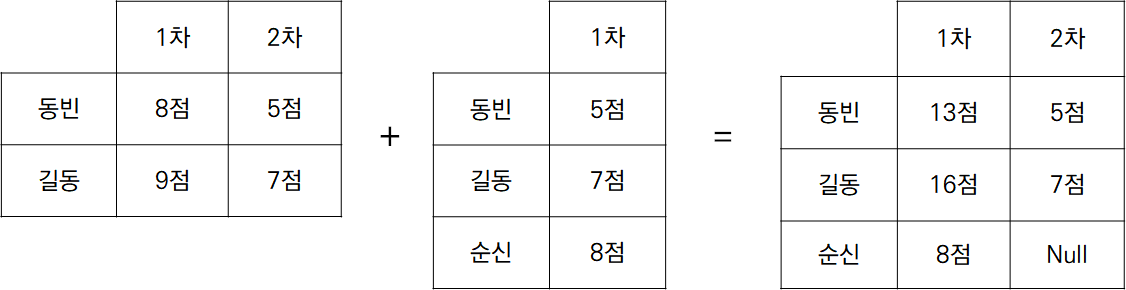

In [0]:
import pandas as pd

array1 = pd.DataFrame([[1, 2], [3, 4]], index=['A', 'B'])
array2 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], index=['B', 'C', 'D'])

print(array1)
print(array2)

array = array1.add(array2, fill_value=0)
print(array)

   0  1
A  1  2
B  3  4
   0  1  2
B  1  2  3
C  4  5  6
D  7  8  9
     0    1    2
A  1.0  2.0  NaN
B  4.0  6.0  3.0
C  4.0  5.0  6.0
D  7.0  8.0  9.0


**데이터 프레임 집계 함수**

In [0]:
import pandas as pd

array1 = pd.DataFrame([[1, 2], [3, 4]], index=['A', 'B'])
array2 = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], index=['B', 'C', 'D'])

array = array1.add(array2, fill_value=0)
print(array)
print("컬럼 1의 합:", array[1].sum())
print(array.sum())

     0    1    2
A  1.0  2.0  NaN
B  4.0  6.0  3.0
C  4.0  5.0  6.0
D  7.0  8.0  9.0
컬럼 1의 합: 21.0
0    16.0
1    21.0
2    18.0
dtype: float64


**데이터 프레임 정렬 함수**

In [0]:
import pandas as pd
import numpy as np

word_dict = {
    'Apple': '사과',
    'Banana': '바나나',
    'Carrot': '당근',
    'Durian': '두리안'
}

frequency_dict = {
    'Apple': 3,
    'Banana': 5,
    'Carrot': 1,
    'Durian': 2
}

importance_dict = {
    'Apple': 3,
    'Banana': 2,
    'Carrot': 1,
    'Durian': 1
}

word = pd.Series(word_dict)
frequency = pd.Series(frequency_dict)
importance = pd.Series(importance_dict)

summary = pd.DataFrame({
    'word': word,
    'frequency': frequency,
    'importance': importance
})

print(summary)
# True는 오름차순
summary = summary.sort_values('frequency', ascending= False) # 내림차순
print(summary)

       word  frequency  importance
Apple    사과          3           3
Banana  바나나          5           2
Carrot   당근          1           1
Durian  두리안          2           1
       word  frequency  importance
Banana  바나나          5           2
Apple    사과          3           3
Durian  두리안          2           1
Carrot   당근          1           1
